In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('heart-disease.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
df[cat_cols] = df[cat_cols].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    object 
 2   cp        302 non-null    object 
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    object 
 6   restecg   302 non-null    object 
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    object 
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    object 
 11  ca        302 non-null    int64  
 12  thal      302 non-null    object 
 13  target    302 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 33.2+ KB


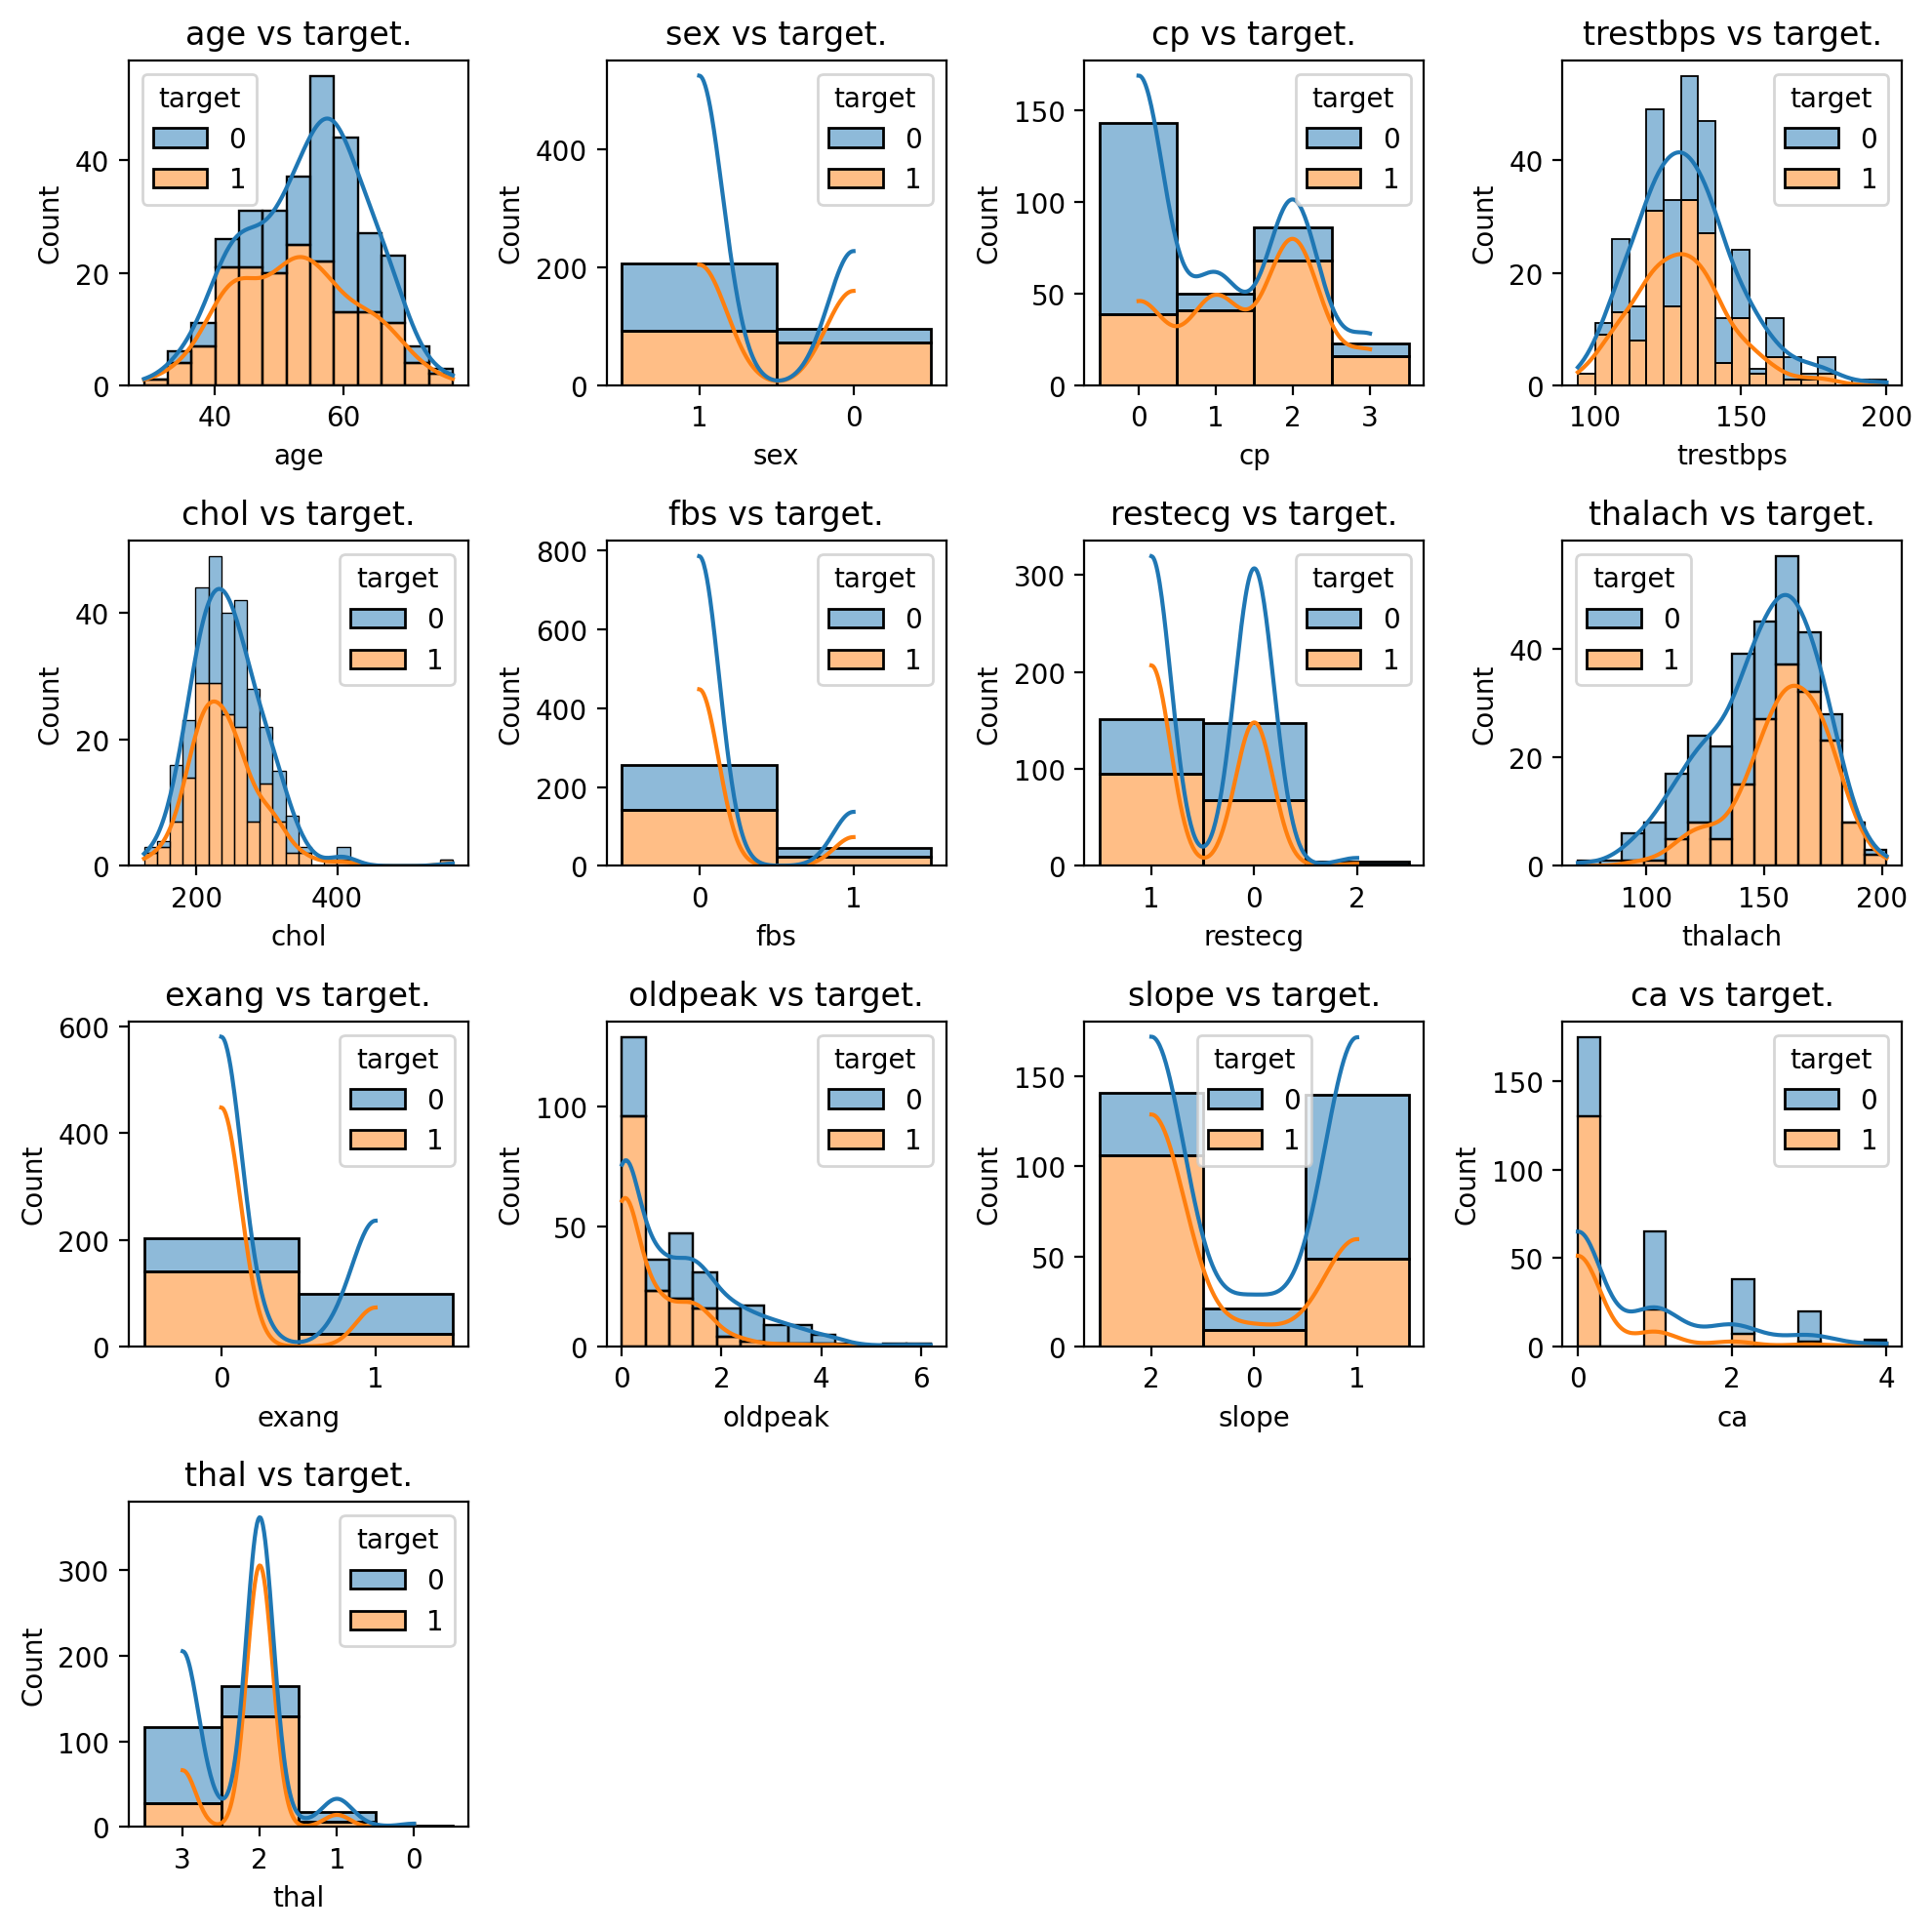

In [19]:
cols = df.columns[:-1]
plt.figure(figsize=(10, 10), dpi= 200)
for i, col in enumerate(cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(x= col, data= df, hue= 'target', multiple= 'stack', kde= True)
    plt.xlabel(col)
    plt.title(f'{col} vs target.')
    plt.tight_layout()

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify= y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((241, 19), (61, 19), (241,), (61,))

In [21]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_predict = ada.predict(X_test)
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))
print(f'Accuracy score: {accuracy_score(y_test, y_predict)}')

              precision    recall  f1-score   support

           0       0.72      0.82      0.77        28
           1       0.83      0.73      0.77        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61

[[23  5]
 [ 9 24]]
Accuracy score: 0.7704918032786885


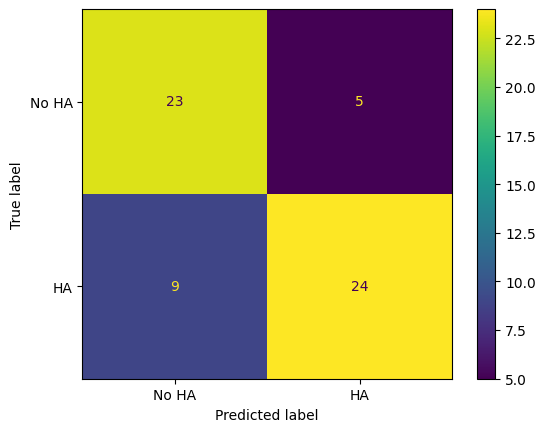

In [27]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_predict), display_labels=['No HA', 'HA']).plot()

In [28]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [50, 100, 150, 200, 250], 'learning_rate': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(AdaBoostClassifier(), params, cv= 5, n_jobs= 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=5,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 100, 150, 200, 250]})

In [32]:
grid.best_estimator_, grid.best_params_, grid.best_score_

(AdaBoostClassifier(learning_rate=0.1, n_estimators=150),
 {'learning_rate': 0.1, 'n_estimators': 150},
 0.7968537414965986)

In [33]:
y_predict = grid.predict(X_test) #type: ignore
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))
print(f'Accuracy score: {accuracy_score(y_test, y_predict)}')

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        28
           1       0.82      0.85      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

[[22  6]
 [ 5 28]]
Accuracy score: 0.819672131147541


In [36]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_predict = xgb.predict(X_test)

In [37]:
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))
print(f'Accuracy score: {accuracy_score(y_test, y_predict)}')

              precision    recall  f1-score   support

           0       0.72      0.75      0.74        28
           1       0.78      0.76      0.77        33

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61

[[21  7]
 [ 8 25]]
Accuracy score: 0.7540983606557377


In [61]:
params = {'n_estimators': [300, 350, 400],
        'learning_rate':[0.01, 0.1, 1],
        'max_depth': [1,2,3,4,5],
        'lambda':[3,4,5]}
grid = GridSearchCV(XGBClassifier(), params, cv= 5, n_jobs=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=5,
             param_grid={'lambda': [3, 4, 5], 'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [300, 350, 400]})

In [62]:
grid.best_estimator_, grid.best_params_, grid.best_score_

(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, lambda=5, learning_rate=0.01,
               max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=2, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=350, n_jobs=None, num_parallel_tree=None,
               predictor=None, ...),
 {'lambda': 5, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 350},
 0.8047619047619048)

In [63]:
y_predict = grid.predict(X_test) #type: ignore
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))
print(f'Accuracy score: {accuracy_score(y_test, y_predict)}')

              precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61

[[21  7]
 [ 5 28]]
Accuracy score: 0.8032786885245902


In [71]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier()
cat.fit(X_train, y_train)

Learning rate set to 0.005611
0:	learn: 0.6879916	total: 1.49ms	remaining: 1.49s
1:	learn: 0.6836448	total: 2.93ms	remaining: 1.46s
2:	learn: 0.6793028	total: 4.48ms	remaining: 1.49s
3:	learn: 0.6747151	total: 6.01ms	remaining: 1.5s
4:	learn: 0.6701426	total: 7.32ms	remaining: 1.46s
5:	learn: 0.6659928	total: 8.71ms	remaining: 1.44s
6:	learn: 0.6619987	total: 9.97ms	remaining: 1.41s
7:	learn: 0.6580310	total: 11.6ms	remaining: 1.44s
8:	learn: 0.6545913	total: 13.2ms	remaining: 1.45s
9:	learn: 0.6502593	total: 14.6ms	remaining: 1.44s
10:	learn: 0.6465863	total: 15.9ms	remaining: 1.43s
11:	learn: 0.6434534	total: 17.2ms	remaining: 1.41s
12:	learn: 0.6399455	total: 18.8ms	remaining: 1.42s
13:	learn: 0.6372669	total: 20.2ms	remaining: 1.42s
14:	learn: 0.6332144	total: 21.8ms	remaining: 1.43s
15:	learn: 0.6298539	total: 23.1ms	remaining: 1.42s
16:	learn: 0.6262592	total: 24.3ms	remaining: 1.4s
17:	learn: 0.6224917	total: 25.6ms	remaining: 1.4s
18:	learn: 0.6193326	total: 26.9ms	remaining: 1

In [72]:
y_predict = cat.predict(X_test)
print(accuracy_score(y_test, y_predict))

0.7868852459016393


In [73]:
params = {'n_estimators': [50, 100, 150, 200, 250],
        'learning_rate':[0.01, 0.1, 1],
        'depth': [1,5,10,15,20]}
grid = GridSearchCV(CatBoostClassifier(), params, cv= 5, n_jobs=-1)
grid.fit(X_train, y_train)

0:	learn: 0.6780853	total: 813us	remaining: 162ms
1:	learn: 0.6495435	total: 1.39ms	remaining: 138ms
2:	learn: 0.6295698	total: 1.97ms	remaining: 129ms
3:	learn: 0.6078878	total: 2.58ms	remaining: 127ms
4:	learn: 0.5921634	total: 3.21ms	remaining: 125ms
5:	learn: 0.5777187	total: 3.75ms	remaining: 121ms
6:	learn: 0.5657500	total: 4.29ms	remaining: 118ms
7:	learn: 0.5553921	total: 4.79ms	remaining: 115ms
8:	learn: 0.5428570	total: 5.3ms	remaining: 112ms
9:	learn: 0.5328466	total: 5.89ms	remaining: 112ms
10:	learn: 0.5238874	total: 6.48ms	remaining: 111ms
11:	learn: 0.5116643	total: 6.99ms	remaining: 109ms
12:	learn: 0.5019066	total: 7.5ms	remaining: 108ms
13:	learn: 0.4954559	total: 7.99ms	remaining: 106ms
14:	learn: 0.4858407	total: 8.52ms	remaining: 105ms
15:	learn: 0.4791633	total: 9.06ms	remaining: 104ms
16:	learn: 0.4766465	total: 9.64ms	remaining: 104ms
17:	learn: 0.4713439	total: 10.3ms	remaining: 104ms
18:	learn: 0.4706201	total: 10.9ms	remaining: 104ms
19:	learn: 0.4638377	tota

C:\Users\mohanad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
75 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mohanad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mohanad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001A5FCC1E590>,
             n_jobs=-1,
             param_grid={'depth': [1, 5, 10, 15, 20],
                         'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 150, 200, 250]})

In [74]:
grid.best_estimator_, grid.best_params_, grid.best_score_

(<catboost.core.CatBoostClassifier at 0x1a5faac8750>,
 {'depth': 1, 'learning_rate': 0.1, 'n_estimators': 200},
 0.8091836734693878)

In [75]:
y_predict = grid.predict(X_test)
print(accuracy_score(y_test, y_predict))

0.819672131147541


In [78]:
X = df.drop('target', axis= 1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [79]:
cat = CatBoostClassifier()
cat.fit(X_train, y_train)
y_predict =cat.predict(X_test)

Learning rate set to 0.005611
0:	learn: 0.6879368	total: 1.47ms	remaining: 1.47s
1:	learn: 0.6838143	total: 2.48ms	remaining: 1.24s
2:	learn: 0.6800127	total: 3.63ms	remaining: 1.21s
3:	learn: 0.6748694	total: 4.79ms	remaining: 1.19s
4:	learn: 0.6703444	total: 5.85ms	remaining: 1.16s
5:	learn: 0.6658063	total: 6.82ms	remaining: 1.13s
6:	learn: 0.6621528	total: 7.88ms	remaining: 1.12s
7:	learn: 0.6576434	total: 9.29ms	remaining: 1.15s
8:	learn: 0.6526455	total: 10.4ms	remaining: 1.15s
9:	learn: 0.6491012	total: 11.5ms	remaining: 1.14s
10:	learn: 0.6444124	total: 12.5ms	remaining: 1.12s
11:	learn: 0.6406517	total: 13.5ms	remaining: 1.11s
12:	learn: 0.6369287	total: 14.6ms	remaining: 1.11s
13:	learn: 0.6332294	total: 15.7ms	remaining: 1.11s
14:	learn: 0.6313200	total: 16.6ms	remaining: 1.09s
15:	learn: 0.6264900	total: 17.8ms	remaining: 1.09s
16:	learn: 0.6234180	total: 18.7ms	remaining: 1.08s
17:	learn: 0.6204318	total: 19.8ms	remaining: 1.08s
18:	learn: 0.6165240	total: 20.8ms	remaining

In [81]:
print(accuracy_score(y_test, y_predict))

0.8360655737704918
